## Neural network, experimentation tool, version 2

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# activation functions
# ReLu is very simple, it filters out all negative values
# this is a powerful activation function in reality
def activation_ReLu(number):
    if number > 0:
        return number
    else:
        return 0


# we also need a derivated version of ReLu
# otherwise same as original, but instead of original value, return 1 instead
def activation_ReLu_partial_derivative(number):
    if number > 0:
        return 1
    else:
        return 0

In [58]:
# lock down the randomness in order to get same results everytime
# you can change or disable this if you want
np.random.seed(123)

def generate_train_data():
    result = []

    # create 100 numbers
    for x in range(100):
        n1 = np.random.randint(0, 5)
        n2 = np.random.randint(3, 7)

        # formula for the target variable: x1 ^^ 2 + x2 + (random integer between 0-5)
        # the only point of this is to have some kind of logic in the data
        n3 = n1 ** 2 + n2 + np.random.randint(0, 5)
        n3 = int(n3)

        result.append([n1, n2, n3])


    return result


In [59]:
# initialize weights and biases
# in Keras/TensorFlow/PyTorch etc. these are usually randomized in the beginning
w1 = 0.5 # starting value 1.5
w2 = -0.5 # 0.5
w3 = 0.5 # -2
w4 = -0.5 # -0.5
w5 = 0.5 # 1.5
w6 = -0.5 # 1.2

bias1 = 1  # starting value 1
bias2 = -1 # starting value -0.35
bias3 = 1 # starting value 0.5

# just for comparison after the training
original_w1 = w1
original_w2 = w2
original_w3 = w3
original_w4 = w4
original_w5 = w5
original_w6 = w6
original_b1 = bias1
original_b2 = bias2
original_b3 = bias3

# use generated training data from our helper function
data = generate_train_data()

# learning rate
LR = 0.0004
epochs = 1000

# let's initalize a list for loss visualizations
loss_points = []

for epoch in range(epochs):

    # the previous version only measured the loss value
    # of the last calculation done in the code (node 3)
    # it's probably better to measure the average loss for each epoch
    epoch_losses = []

    for row in data:
        # this is where we do Forward pass + backpropagation
        input1 = row[0]
        input2 = row[1]
        true_value = row[2]

        # NODE 1 OUTPUT
        node_1_output = input1 * w1 + input2 * w3 + bias1
        node_1_output = activation_ReLu(node_1_output)

        # NODE 2 OUTPUT
        node_2_output = input1 * w2 + input2 * w4 + bias2
        node_2_output = activation_ReLu(node_2_output)

        # NODE 3 OUTPUT
        # we can just use Node 1 and 2 outputs, since they
        # already contain the previous weights in their result
        node_3_output = node_1_output * w5 + node_2_output * w6 + bias3
        node_3_output = activation_ReLu(node_3_output)

        # LOSS FUNCTION - we are going to use MSE -> mean squared error
        # MSE formula for LOSS => (predicted_value - true_value) ^ 2
        predicted_value = node_3_output
        loss = (predicted_value - true_value) ** 2

        # add current loss into epoch losses -list
        epoch_losses.append(loss)
        
        # BACKPROPAGATION - LAST LAYER FIRST
        # solving the partial derivative of the loss function with respect to w5
        deriv_L_w5 = 2 * node_1_output * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        new_w5 = w5 - LR * deriv_L_w5

        deriv_L_w6 = 2 * node_2_output * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        new_w6 = w6 - LR * deriv_L_w6

        deriv_L_b3 = 2 * 1 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        new_b3 = bias3 - LR * deriv_L_b3

        # BACKPROPAGATION - THE FIRST LAYER
        # FROM THIS POINT ONWARD WE HAVE TO USE THE MORE COMPLEX VERSION
        # OF UPDATING THE VALUES => CHAIN RULE

        # weight 1
        deriv_L_w1_left = 2 * w5 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w1_right = activation_ReLu_partial_derivative(input1 * w1 + input2 * w3 + bias1) * input1
        deriv_L_w1 = deriv_L_w1_left * deriv_L_w1_right
        new_w1 = w1 - LR * deriv_L_w1

        # weight 2
        deriv_L_w2_left = 2 * w6 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w2_right = activation_ReLu_partial_derivative(input1 * w2 + input2 * w4 + bias2) * input1
        deriv_L_w2 = deriv_L_w2_left * deriv_L_w2_right
        new_w2 = w2 - LR * deriv_L_w2

        # weight 3
        deriv_L_w3_left = 2 * w5 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w3_right = activation_ReLu_partial_derivative(input1 * w1 + input2 * w3 + bias1) * input2
        deriv_L_w3 = deriv_L_w3_left * deriv_L_w3_right
        new_w3 = w3 - LR * deriv_L_w3

        # weight 4
        deriv_L_w4_left = 2 * w6 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w4_right = activation_ReLu_partial_derivative(input1 * w2 + input2 * w4 + bias2) * input2
        deriv_L_w4 = deriv_L_w4_left * deriv_L_w4_right
        new_w4 = w4 - LR * deriv_L_w4

        # bias 1
        deriv_L_b1_left = 2 * w5 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_b1_right = activation_ReLu_partial_derivative(input1 * w1 + input2 * w3 + bias1) * 1
        deriv_L_b1 = deriv_L_b1_left * deriv_L_b1_right
        new_b1 = bias1 - LR * deriv_L_b1

        # bias 2
        deriv_L_b2_left = 2 * w6 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_b2_right = activation_ReLu_partial_derivative(input1 * w2 + input2 * w4 + bias2) * 1
        deriv_L_b2 = deriv_L_b2_left * deriv_L_b2_right
        new_b2 = bias2 - LR * deriv_L_b2

        # ALL DONE! FINALLY UPDATE THE EXISTING WEIGHTS
        w1 = new_w1
        w2 = new_w2
        w3 = new_w3
        w4 = new_w4
        w5 = new_w5
        w6 = new_w6
        bias1 = new_b1
        bias2 = new_b2
        bias3 = new_b3

    # calculate average epoch-wise loss and add it to loss points
    average_loss = sum(epoch_losses) / len(epoch_losses)

    # place the overall epoch loss into the loss_points list
    loss_points.append(average_loss)
    print(f"Epoch: {epoch + 1}, loss: {average_loss}")
        

Epoch: 1, loss: 28.389667713167928
Epoch: 2, loss: 10.184948530814802
Epoch: 3, loss: 6.8566742246444425
Epoch: 4, loss: 5.203997555936813
Epoch: 5, loss: 4.560412950435632
Epoch: 6, loss: 4.353402578167234
Epoch: 7, loss: 4.291869063103325
Epoch: 8, loss: 4.271655968225747
Epoch: 9, loss: 4.262421963304822
Epoch: 10, loss: 4.256183120015454
Epoch: 11, loss: 4.2509011267520895
Epoch: 12, loss: 4.246040056502573
Epoch: 13, loss: 4.2414443225447265
Epoch: 14, loss: 4.237059450193223
Epoch: 15, loss: 4.2328606537870295
Epoch: 16, loss: 4.228833239220659
Epoch: 17, loss: 4.224966584368132
Epoch: 18, loss: 4.221252013945839
Epoch: 19, loss: 4.217681940930515
Epoch: 20, loss: 4.214249479478713
Epoch: 21, loss: 4.210948254527628
Epoch: 22, loss: 4.207772300258078
Epoch: 23, loss: 4.204716000888227
Epoch: 24, loss: 4.201774052460182
Epoch: 25, loss: 4.198941435476017
Epoch: 26, loss: 4.196213393449037
Epoch: 27, loss: 4.19358541492409
Epoch: 28, loss: 4.191053217726361
Epoch: 29, loss: 4.18861

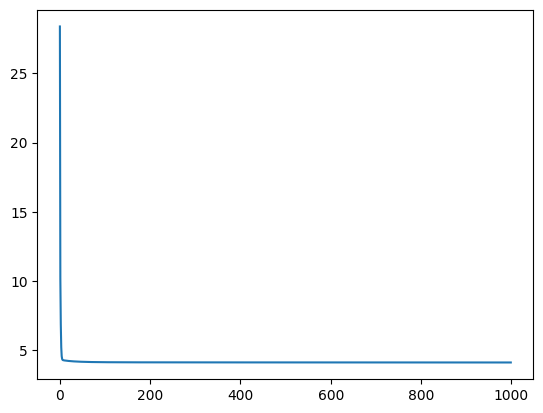

In [60]:
plt.plot(loss_points)
# plt.ylim(-1, 5)
plt.show()



In [61]:
print("ORIGINAL WEIGHTS AND BIASES")
print(f"w1: {original_w1}")
print(f"w2: {original_w2}")
print(f"w3: {original_w3}")
print(f"w4: {original_w4}")
print(f"w5: {original_w5}")
print(f"w6: {original_w6}")
print(f"b1: {original_b1}")
print(f"b2: {original_b2}")
print(f"b3: {original_b3}")

print("\n\n#################################\n\n")

print("NEW WEIGHTS AND BIASES")
print(f"w1: {new_w1}")
print(f"w2: {new_w2}")
print(f"w3: {new_w3}")
print(f"w4: {new_w4}")
print(f"w5: {new_w5}")
print(f"w6: {new_w6}")
print(f"b1: {new_b1}")
print(f"b2: {new_b2}")
print(f"b3: {new_b3}")



ORIGINAL WEIGHTS AND BIASES
w1: 0.5
w2: -0.5
w3: 0.5
w4: -0.5
w5: 0.5
w6: -0.5
b1: 1
b2: -1
b3: 1


#################################


NEW WEIGHTS AND BIASES
w1: 2.40284858318998
w2: -0.5
w3: 0.48405702354753005
w4: -0.5
w5: 1.5612714318544874
w6: -0.5
b1: 0.05360208473832497
b2: -1.0
b3: 1.2274255375686283


In [62]:
# prediction function, just doing the forward pass
# again (but only that)
def predict(x1, x2):
    input1 = x1
    input2 = x2

    # NODE 1 OUTPUT
    node_1_output = input1 * w1 + input2 * w3 + bias1
    node_1_output = activation_ReLu(node_1_output)

    # NODE 2 OUTPUT
    node_2_output = input1 * w2 + input2 * w4 + bias2
    node_2_output = activation_ReLu(node_2_output)

    # NODE 3 OUTPUT
    # we can just use Node 1 and 2 outputs, since they
    # already contain the previous weights in their result
    node_3_output = node_1_output * w5 + node_2_output * w6 + bias3
    node_3_output = activation_ReLu(node_3_output)
    return node_3_output

   

In [63]:
data[1]

[1, 6, 9]

In [64]:
# try using the model with our prediction function
# the value tends to be same as final bias 3
# so if node1 and node2 outputs are small => more or less bias3
result = predict(1, 6)
result

9.597078202684607